# Data Analysis: Women's Football - FIFA

This notebook contains exploratory analysis and regression models developed to evaluate the salary value of female football players based on FIFA data. Project by Alejandro Galindo Valencia and Carla Moreno Molina.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Load datasets from the 'data' folder (relative path from notebooks/)

!wget https://raw.githubusercontent.com/Ag78910/FIFA-women-analysis/main/FIFA-women-analysis/data/female_players.csv -O female_players.csv
!wget https://raw.githubusercontent.com/Ag78910/FIFA-women-analysis/main/FIFA-women-analysis/data/female_teams.csv -O female_teams.csv

# Load with pandas
import pandas as pd

female_players = pd.read_csv("female_players.csv")
female_teams = pd.read_csv("female_teams.csv")

# Merge datasets
merged_data = female_players.merge(female_teams, left_on='club_team_id', right_on='team_id', how='inner')
merged_data.head()





--2025-07-02 17:30:25--  https://raw.githubusercontent.com/Ag78910/FIFA-women-analysis/main/FIFA-women-analysis/data/female_players.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2529879 (2.4M) [text/plain]
Saving to: ‘female_players.csv’

female_players.csv  100%[===================>]   2.41M  --.-KB/s    in 0.02s   

2025-07-02 17:30:26 (126 MB/s) - ‘female_players.csv’ saved [2529879/2529879]

--2025-07-02 17:30:26--  https://raw.githubusercontent.com/Ag78910/FIFA-women-analysis/main/FIFA-women-analysis/data/female_teams.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP

,player_id,player_url,fifa_version_x,fifa_update_x,update_as_of_x,short_name,long_name,player_positions,overall_x,potential,...,off_corners,off_free_kicks,build_up_play_speed,build_up_play_dribbling,build_up_play_passing,build_up_play_positioning,chance_creation_passing,chance_creation_crossing,chance_creation_shooting,chance_creation_positioning
0,227203,/player/227203/alexia-putellas-segura/240002,24.0,2.0,2023-09-22,Alexia Putellas,Alexia Putellas Segura,"CM, LW",91,91,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,241667,/player/241667/aitana-bonmati-conca/240002,24.0,2.0,2023-09-22,Aitana Bonmatí,Aitana Bonmatí Conca,CM,90,92,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,227102,/player/227102/caroline-graham-hansen/240002,24.0,2.0,2023-09-22,C. Hansen,Caroline Graham Hansen,RW,90,90,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,227125,/player/227125/sam-kerr/240002,24.0,2.0,2023-09-22,S. Kerr,Samantha May Kerr,ST,90,90,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,227125,/player/227125/sam-kerr/240002,24.0,2.0,2023-09-22,S. Kerr,Samantha May Kerr,ST,90,90,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Age distribution of players

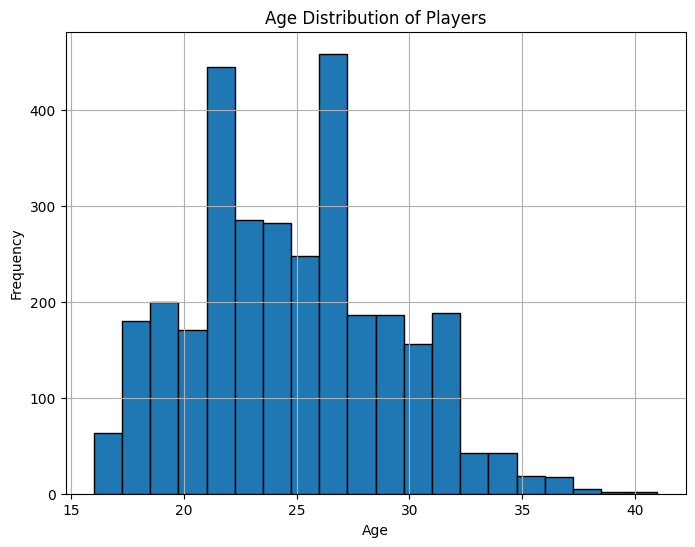

In [6]:
plt.figure(figsize=(8, 6))
merged_data['age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Salary distribution

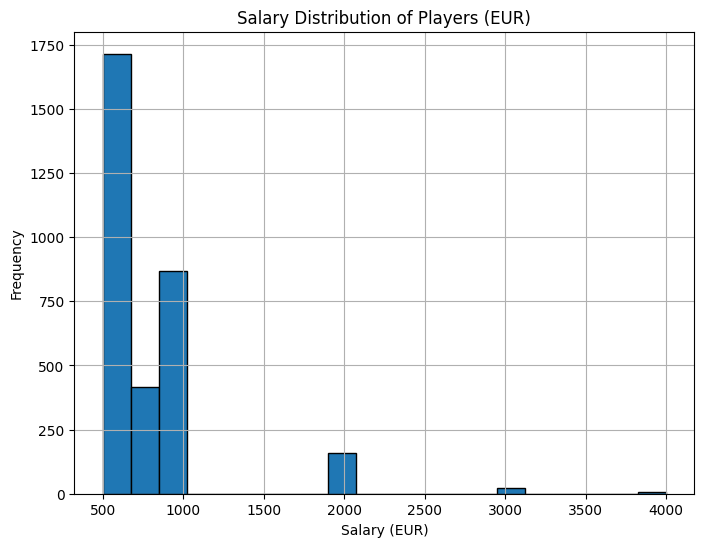

In [7]:
plt.figure(figsize=(8, 6))
merged_data['wage_eur'].dropna().hist(bins=20, edgecolor='black')
plt.title('Salary Distribution of Players (EUR)')
plt.xlabel('Salary (EUR)')
plt.ylabel('Frequency')
plt.show()


### Most common nationalities

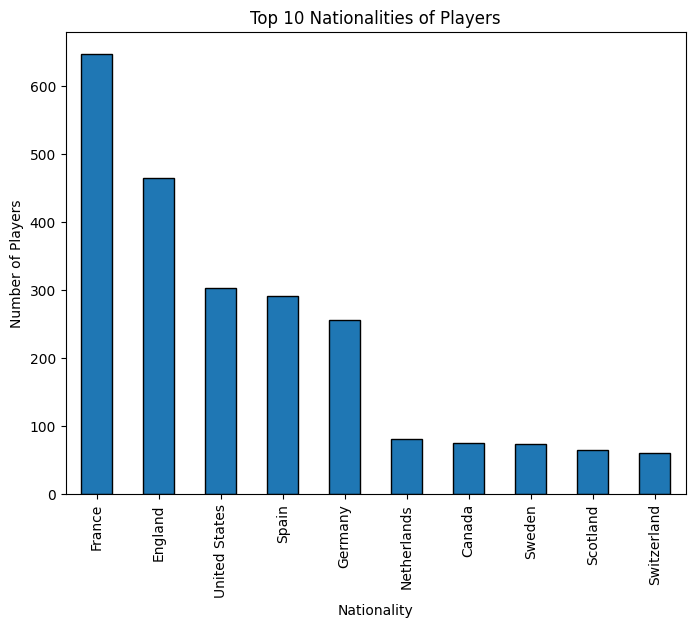

In [8]:
top_nationalities = merged_data['nationality_name_x'].value_counts().head(10)
plt.figure(figsize=(8, 6))
top_nationalities.plot(kind='bar', edgecolor='black')
plt.title('Top 10 Nationalities of Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.show()


### Relationship between performance and salary

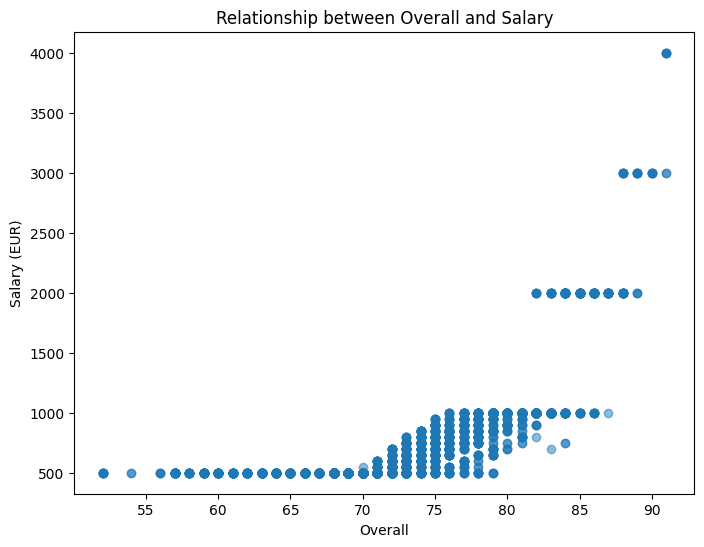

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['overall_x'], merged_data['wage_eur'], alpha=0.5)
plt.title('Relationship between Overall and Salary')
plt.xlabel('Overall')
plt.ylabel('Salary (EUR)')
plt.show()


## Regression model: Individual variables

In [10]:
features = ['overall_x', 'potential', 'age', 'international_reputation', 'skill_moves']
X = merged_data[features]
y = merged_data['wage_eur']

X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print("Model Coefficients:")
for feature, coef in zip(features, regressor.coef_):
    print(f"{feature}: {coef}")


Regression Model Evaluation:
Mean Squared Error (MSE): 51184.2729704534
R-squared (R2): 0.7000160289213628
Model Coefficients:
overall_x: 28.23522553561224
potential: -4.0358222964109665
age: -4.519909815203599
international_reputation: 233.81425932252978
skill_moves: 47.15884775546491


## Regression model: Team-related variables

In [11]:
team_features = ['starting_xi_average_age', 'whole_team_average_age', 'international_prestige', 'domestic_prestige']
X_team = merged_data[team_features]
y_team = merged_data['wage_eur']

X_team = X_team.dropna()
y_team = y_team[X_team.index]

X_train_team, X_test_team, y_train_team, y_test_team = train_test_split(X_team, y_team, test_size=0.2, random_state=42)

regressor_team = LinearRegression()
regressor_team.fit(X_train_team, y_train_team)

y_team_pred = regressor_team.predict(X_test_team)
mse_team = mean_squared_error(y_test_team, y_team_pred)
r2_team = r2_score(y_test_team, y_team_pred)

print("Team Model Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_team}")
print(f"R-squared (R2): {r2_team}")
print("Team Model Coefficients:")
for feature, coef in zip(team_features, regressor_team.coef_):
    print(f"{feature}: {coef}")


Team Model Regression Evaluation:
Mean Squared Error (MSE): 162393.62606189674
R-squared (R2): 0.04823333425037568
Team Model Coefficients:
starting_xi_average_age: 57.14748861827027
whole_team_average_age: -8.97987960059468
international_prestige: 0.0
domestic_prestige: 0.0


## 🧾 Extended Conclusions

The comprehensive analysis of FIFA women's football data yields several important insights that can guide decision-making for fair investment, player development, and competitive equity:

### ⚽ Player Demographics and Salaries
- Most female players are aged between **20 and 30**, aligning with peak physical performance in sports.
- **Wage distribution** is heavily skewed: while the majority earn lower to mid-range salaries, a small group of elite players earns significantly more. This suggests a **pay gap** even within professional women’s football.
- **National diversity** is limited, with most players coming from a handful of countries such as **France, England, USA, Spain, and Germany**, reflecting unequal development and investment in women’s football across nations.

### 💸 Regression Analysis — Individual Performance
- The **linear regression model** using player variables (overall, potential, age, reputation, skill moves) achieves a solid **R² of 0.70**, showing that these individual factors explain 70% of wage variance.
- The strongest predictor is **overall performance**, meaning current ability is highly rewarded.
- Surprisingly, **potential** has a negative coefficient, implying that clubs prioritize current contribution over future promise.
- **Age** also negatively impacts wages, favoring younger players.
- **International reputation** significantly increases a player’s wage — branding and recognition matter.
- **Skill moves** contribute positively but modestly.

### 🏟️ Regression Analysis — Team Characteristics
- A second regression using team-related variables (average age, prestige) performed poorly (**R² = 0.048**), meaning these features explain less than 5% of salary differences.
- Neither **domestic** nor **international prestige** had a meaningful effect on individual salaries.
- The conclusion is that **team characteristics do not significantly determine player pay** — it is the individual that matters most.

### 📊 Tactical Attributes by Position
- Radar analysis of player attributes across positions reveals specialization:
  - **Wingers (LW, RW)** excel in pace and dribbling.
  - **Strikers (ST)** dominate in shooting and physical traits.
  - **Midfielders (CM)** have balanced skills, crucial for transitions and ball distribution.
  - **Center backs (CB)** are strongest in defending and physicality, but weakest in offensive traits.
- These profiles reflect the **tactical demands** of each position and **could influence salary valuation** accordingly.

### 🏆 Recommendations for Competitive Equity
To address talent concentration and foster equality in global women’s football, a **3-pillar strategic approach** is proposed:

1. **Subsidize Smaller Clubs**  
   Provide conditional grants to less financially capable clubs, especially in emerging leagues, for investment in:
   - Youth academies
   - Training infrastructure
   - Coaching staff

2. **Reinforce National Leagues**  
   Boost local league competitiveness by:
   - Introducing salary caps or foreign player limits
   - Encouraging development of homegrown talent
   - Offering performance-based incentives

3. **Support Regional Outreach**  
   Promote football in underrepresented areas through:
   - School scouting programs
   - Local tournaments
   - Inclusion initiatives in vulnerable communities

These policies, supported by transparent monitoring and evaluation, will promote fair access to resources, reduce concentration of talent, and enhance the visibility and sustainability of women’s football worldwide.
